<a href="https://colab.research.google.com/github/Auful01/PCVK/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan : 50


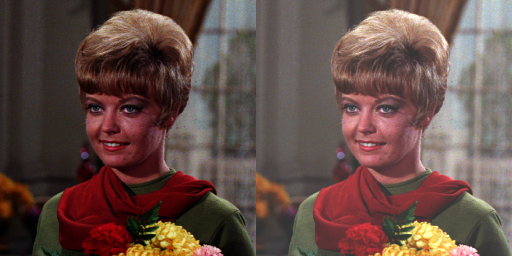

In [4]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

print('Mengubah tingkat kecerahan citra')
print('--------------------------------')

try: 
  brightness = int(input('Masukkan nilai kecerahan : '))
except ValueError:
  print('error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

final_frame = cv.hconcat((original, brightness_image))

cv2_imshow(final_frame)

Mengubah kontras dan tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan [-255 - 255]: 60
Masukkan kontras [1.0 - 3.0]:1.5


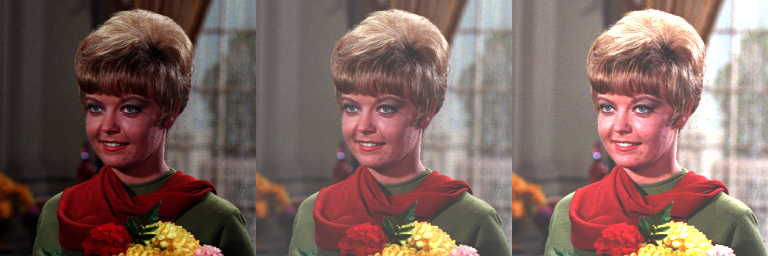

In [5]:
print('Mengubah kontras dan tingkat kecerahan citra')
print('--------------------------------')

try: 
  brightness = int(input('Masukkan nilai kecerahan [-255 - 255]: '))
  contrast = float(input('Masukkan kontras [1.0 - 3.0]:'))
except ValueError:
  print('error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)
contrast_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)
      contrast_image[y,x,c] = np.clip(contrast * original[y,x,c] + brightness, 0, 255)

final_frame = cv.hconcat((original, brightness_image, contrast_image))

cv2_imshow(final_frame)

Mengubah tingkat kecerahan citra dengan transformasi Log
--------------------------------
Masukkan nilai kecerahan : 40


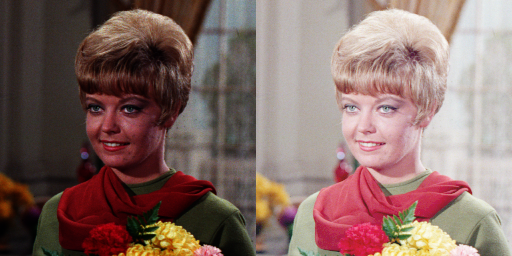

In [6]:
print('Mengubah tingkat kecerahan citra dengan transformasi Log')
print('--------------------------------')

try: 
  brightness = int(input('Masukkan nilai kecerahan : '))
except ValueError:
  print('error, not a number')

# log_image = np.zeros(original.shape, original.dtype)

c = 255/ np.log(1 + np.max(original))
log_image = c * (np.log(original + 1))

log_image = np.array(log_image, dtype=np.uint8)

final = cv.hconcat((original, log_image))

cv2_imshow(final)

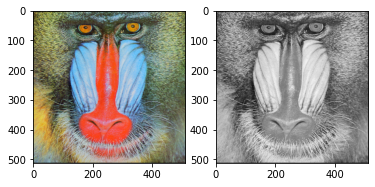

In [69]:
from PIL import Image
original2 = cv.imread('/content/drive/MyDrive/PCVK/mandrill.tiff')

original3 = cv.cvtColor(original2, cv.COLOR_BGR2RGB)

R, G, B = original3[:,:,0], original3[:,:,1], original3[:,:,2]

gscl = np.mean(original3, axis=2)

f = plt.figure()
f.add_subplot(1,2, 1)
plt.imshow(original3)
f.add_subplot(1,2, 2)
plt.imshow(gscl, cmap='gray')
plt.show(block=True)

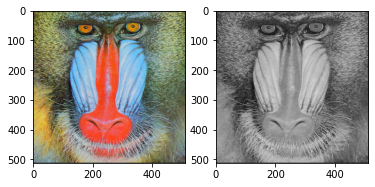

In [72]:

original4 = cv.cvtColor(original2, cv.COLOR_BGR2RGB)
original4[:] = np.max(original4,axis=-1,keepdims=1)/2+np.min(original4,axis=-1,keepdims=1)/2

hasil = np.array(original4, dtype=np.uint8)

f = plt.figure()
f.add_subplot(1,2, 1)
plt.imshow(original3)
f.add_subplot(1,2, 2)
plt.imshow(hasil)
plt.show(block=True)


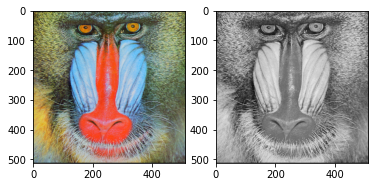

In [71]:
Z = 0.21 * R + 0.72 * G + 0.07 * B

f = plt.figure()
f.add_subplot(1,2, 1)
plt.imshow(original3)
f.add_subplot(1,2, 2)
plt.imshow(Z, cmap='gray')
plt.show(block=True)

In [94]:
original5 = cv.cvtColor(original2, cv.COLOR_BGR2RGB)
original5[200:400,180:450]

array([[[135, 188, 223],
        [152, 193, 219],
        [171, 201, 221],
        ...,
        [133, 157, 132],
        [116, 143, 115],
        [ 92, 113,  79]],

       [[149, 191, 221],
        [144, 190, 218],
        [165, 197, 219],
        ...,
        [186, 204, 162],
        [184, 209, 183],
        [178, 202, 190]],

       [[130, 188, 226],
        [129, 184, 218],
        [150, 189, 214],
        ...,
        [211, 218, 187],
        [201, 216, 193],
        [183, 209, 195]],

       ...,

       [[237, 102, 114],
        [239,  87, 105],
        [236,  91, 115],
        ...,
        [120, 132, 114],
        [111, 120, 123],
        [126, 128, 117]],

       [[238,  85,  88],
        [238,  90,  94],
        [240,  70,  83],
        ...,
        [120, 127,  91],
        [138, 124, 105],
        [118, 117,  85]],

       [[237,  91,  89],
        [242,  79,  77],
        [241,  87,  94],
        ...,
        [139, 149, 152],
        [132, 145, 139],
        [134, 136, 114]]

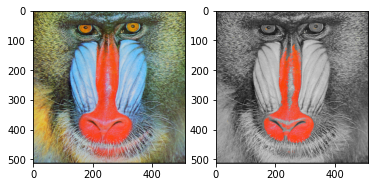

In [109]:
original5 = cv.cvtColor(original2, cv.COLOR_BGR2RGB)
original5[:,:,:]

for i in range(original5.shape[0]):
    for j in range(original5.shape[1]):
        if (original5[i,j,0] < 230 and original5[i,j,1] <220 ):
            original5[i,j]= np.mean(original5[i,j])

# plt.imshow()
f = plt.figure()
f.add_subplot(1,2, 1)
plt.imshow(original3)
f.add_subplot(1,2, 2)
plt.imshow(original5)
plt.show(block=True)